In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [119]:
g = nx.read_gexf('graph.gexf') 

In [123]:
# check that graph is read back correctly
len(g) 
g['PATRIOT/JEFF MACE']['PATRIOT/JEFF MACE']['weight']

2550.0

In [3]:
# remember to pip install
from node2vec import Node2Vec


C:\Users\brian\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [18]:
# Generate walks
# will take a while
node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100)


In [22]:
# save out session state if needed
import dill
dill.dump_session('notebook_env.db')

In [2]:
# Learn embeddings 
# another long while
model = node2vec.fit(window=10, min_count=1)

In [4]:
import pickle
filename = 'node2vec_model.sav'
#pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))


In [5]:
# we find top similar characters
model.wv.most_similar('CAPTAIN AMERICA', topn=15)


[('JARVIS, EDWIN ', 0.8652085065841675),
 ('ANT-MAN/DR. HENRY J.', 0.8592347502708435),
 ('SIKORSKY, RAYMOND', 0.8548966646194458),
 ('FALCON/SAM WILSON', 0.8435205221176147),
 ('WASP/JANET VAN DYNE ', 0.8273553848266602),
 ('MCELROY, JAMES', 0.8218629956245422),
 ('VISION ', 0.815720796585083),
 ('RAVONNA LEXUS RENSLA', 0.7826374769210815),
 ('RED SKULL/JOHANN SCH', 0.774689257144928),
 ('DEMOLITION MAN/DENNI', 0.7746118307113647),
 ('CARTER, PEGGY', 0.7686989307403564),
 ('STANKOWICZ, FABIAN', 0.7686619162559509),
 ('KORVAC, MICHAEL', 0.7571008801460266),
 ('HAWK', 0.7521514892578125),
 ('SENSATIONAL HYDRA/A ', 0.7510486245155334)]

In [45]:
# similarity between selected characters
model.wv.similarity('CAPTAIN AMERICA','CYCLOPS/SCOTT SUMMER')

-0.07384679774173458

In [46]:
# similarity vs distance
model.wv.distance('CAPTAIN AMERICA','CYCLOPS/SCOTT SUMMER')-1

0.07384679774173453

In [37]:
model.wv.distance('JARVIS, EDWIN ','LITTLE, ABNER')

0.5163565516635077

In [41]:
model.predict_output_word(context_words_list=['CAPTAIN AMERICA','LITTLE, ABNER'])

[('LITTLE, ABNER', 0.014942815),
 ('CARNIVORE/COUNT ANDR', 0.014671231),
 ('PRINCESS ZANDA', 0.011822397),
 ('HOGAN, VIRGINIA PEPP', 0.008331926),
 ('DECAY II/YOSHIRO HAC', 0.007901783),
 ('INFERNO III/SAMANTHA', 0.006688789),
 ('STONECUTTER/UTAMA TO', 0.0062227566),
 ('HOGAN, HAROLD J. HAP', 0.006006196),
 ('MANN, DR. J. VERNON ', 0.0056378185),
 ('BYRD, SEN. HARRINGTO', 0.005627934)]

In [13]:
model.most_similar(positive=['CAPTAIN AMERICA'], negative=['MISS AMERICA/MADELIN'])

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('DR. OCTOPUS/OTTO OCT', 0.7177603244781494),
 ('SPIDER-MAN/PETER PAR', 0.7152779698371887),
 ('LIZARD/DR. CURTIS CO', 0.6852928400039673),
 ('ULTRON', 0.6725605726242065),
 ('SANDMAN/WILLIAM BAKE', 0.6702711582183838),
 ('OSBORN, HARRY', 0.6649492979049683),
 ('PICARO/FELIPE', 0.6590644121170044),
 ('PARKER, MAY', 0.657421350479126),
 ('SCHEMER/RICHARD FISK', 0.6568256616592407),
 ('BLACK CAT/FELICIA HA', 0.6538397669792175)]

In [20]:
from sklearn.manifold import TSNE

embeddings = np.array([model.wv[i] for i in model.wv.vocab ])


In [268]:
type( model.wv['LITTLE, ABNER'])


numpy.ndarray

In [256]:
model.wv['LITTLE, ABNER']

array([ 4.17095   , -0.19429351, -3.7561333 , -2.8609908 ,  0.01444816,
       -1.7241056 ,  0.80669546, -0.49275964,  3.0814233 , -1.2851326 ,
        1.9046249 ,  2.767844  ,  1.746919  , -1.4053617 , -4.4133267 ,
       -0.65442723, -2.7220395 , -3.3742115 ,  0.22281434, -4.95841   ],
      dtype=float32)

In [114]:
len(embeddings)

6426

In [21]:

tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [244]:
embeddings_2d.shape

(6426, 2)

In [105]:
model.wv['SPIDER-MAN/PETER PAR']

array([-5.1438346 ,  3.8081942 , -2.813464  ,  3.8015187 , -0.44214833,
        3.0015962 , -0.3458974 ,  2.7286322 , -4.449345  , -2.7225494 ,
       -0.36778554,  2.3601246 ,  2.4234307 , -2.4428544 , -3.0922093 ,
       -2.7721474 , -0.9120338 , -2.5853953 , -1.6498612 , -2.6722753 ],
      dtype=float32)

In [207]:
colors[5045]


10000

In [28]:
# use this for finding selected characters

j=0
for i in model.wv.vocab:
  j=j+1
  if( (model.wv['LITTLE, ABNER']==model.wv[i]).all()   ):

    print(j)  

# CAPTAIN AMERICA is 24
# spider man 181
# miss america 1057
# cyclops 34
# JARVIS, EDWIN  450
# little abner 3992

3992


In [47]:
colors = np.full((6426, 4 ), 10000)

colors = [[0, 0, 1, 0.1],] * 6426

In [48]:
# for selected character at index 
colors[181] = [1, 0, 0, 1]
#colors[34] = [1, 0, 0, 1]


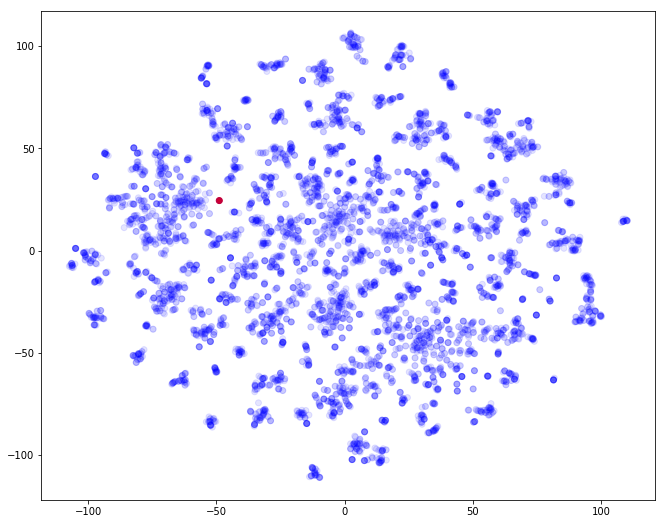

In [49]:
# for spider-man
figure = plt.figure(figsize=(11, 9))
ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors) 
